In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [10]:
adult = pd.read_csv("/content/adult_with_headers.csv")
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Data Exploration and Preprocessing

# Categorical Distributions

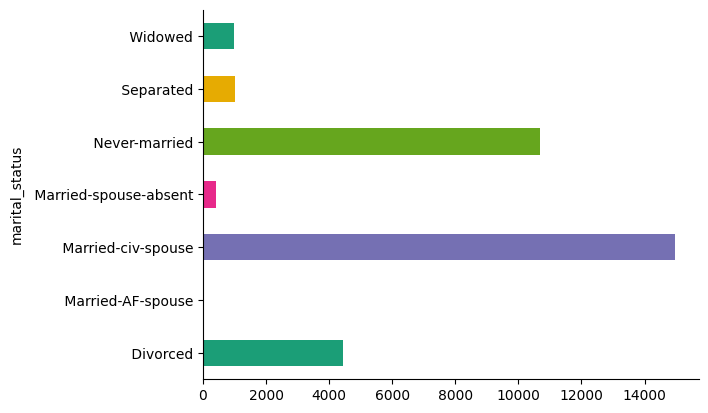

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
adult.groupby('marital_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

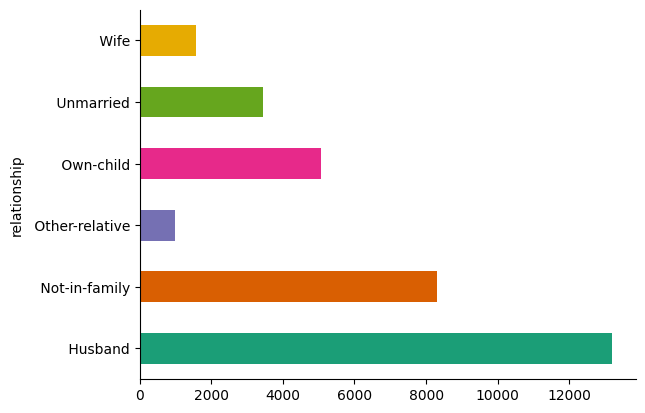

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
adult.groupby('relationship').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

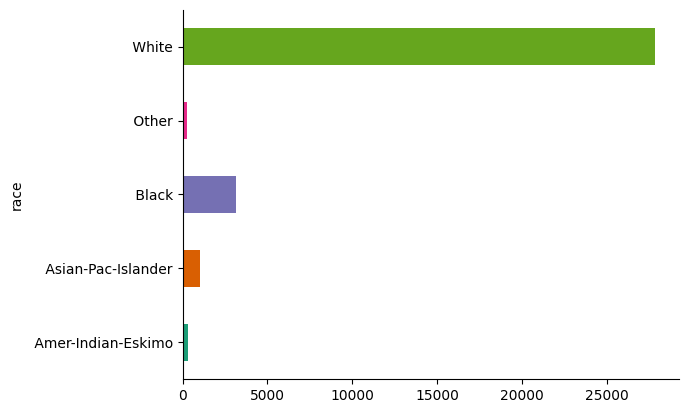

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
adult.groupby('race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

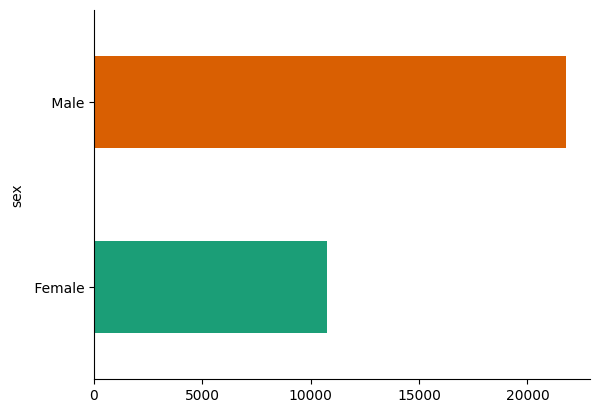

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
adult.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

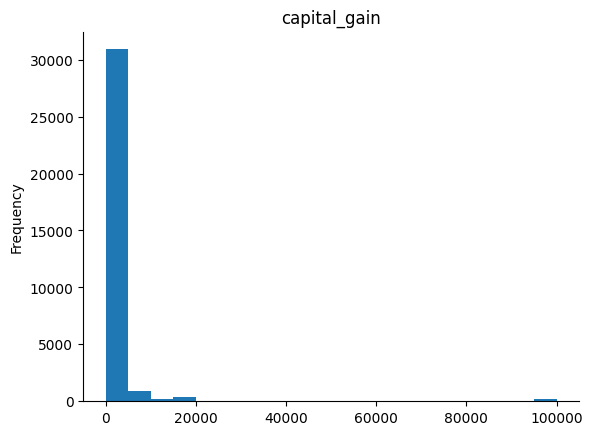

In [15]:
from matplotlib import pyplot as plt
adult['capital_gain'].plot(kind='hist', bins=20, title='capital_gain')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
adult.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [17]:
adult.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [18]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
adult.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [21]:
from sklearn.preprocessing import OneHotEncoder

# Encoding Techniques

In [22]:
#enc = OneHotEncoder(handle_unknown='ignore')
#enc_df = pd.DataFrame(enc.fit_transform(adult[['race']]).toarray())
enc_df=pd.get_dummies(adult[["race"]],dtype='int')

In [23]:
adult= adult.iloc[:,0:15].join(enc_df)
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,0,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,0,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,0,0,0,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0,0,0,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0,0,0,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,0,0,0,1


In [24]:
enc_df1=pd.get_dummies(adult[["sex"]],dtype='int')

In [25]:
adult= adult.iloc[:,0:21].join(enc_df1)
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,hours_per_week,native_country,income,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,40,United-States,<=50K,0,0,0,0,1,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,13,United-States,<=50K,0,0,0,0,1,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,40,United-States,<=50K,0,0,0,0,1,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,40,United-States,<=50K,0,0,1,0,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,40,Cuba,<=50K,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,38,United-States,<=50K,0,0,0,0,1,1,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,40,United-States,>50K,0,0,0,0,1,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,40,United-States,<=50K,0,0,0,0,1,1,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,20,United-States,<=50K,0,0,0,0,1,0,1


In [26]:
adult=adult.drop(["race","sex"],axis=1)
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,40,United-States,<=50K,0,0,0,0,1,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,13,United-States,<=50K,0,0,0,0,1,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,40,United-States,<=50K,0,0,0,0,1,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40,United-States,<=50K,0,0,1,0,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,40,Cuba,<=50K,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,<=50K,0,0,0,0,1,1,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,>50K,0,0,0,0,1,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,<=50K,0,0,0,0,1,1,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,0,0,20,United-States,<=50K,0,0,0,0,1,0,1


In [27]:
labelencoder = LabelEncoder()
adult["workclass"] = labelencoder.fit_transform(adult["workclass"])
adult["education"] = labelencoder.fit_transform(adult["education"])
adult["marital_status"] = labelencoder.fit_transform(adult["marital_status"])
adult["occupation"] = labelencoder.fit_transform(adult["occupation"])
adult["relationship"] = labelencoder.fit_transform(adult["relationship"])
adult["native_country"] = labelencoder.fit_transform(adult["native_country"])
adult["income"] = labelencoder.fit_transform(adult["income"])

In [28]:
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
scaled_data_minmax = minmax_scaler.fit_transform(adult)
scaled_data_minmax

array([[0.30136986, 0.875     , 0.0443019 , ..., 1.        , 0.        ,
        1.        ],
       [0.45205479, 0.75      , 0.0482376 , ..., 1.        , 0.        ,
        1.        ],
       [0.28767123, 0.5       , 0.13811345, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.56164384, 0.5       , 0.09482688, ..., 1.        , 1.        ,
        0.        ],
       [0.06849315, 0.5       , 0.12849934, ..., 1.        , 0.        ,
        1.        ],
       [0.47945205, 0.625     , 0.18720338, ..., 1.        , 1.        ,
        0.        ]])

In [29]:
# Standard Scaling
standard_scaler = StandardScaler()
scaled_data_standard = standard_scaler.fit_transform(adult)
scaled_data_standard

array([[ 0.03067056,  2.15057856, -1.06361075, ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [ 0.83710898,  1.46373585, -1.008707  , ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [-0.04264203,  0.09005041,  0.2450785 , ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       ...,
       [ 1.42360965,  0.09005041, -0.35877741, ...,  0.4130197 ,
         1.42233076, -1.42233076],
       [-1.21564337,  0.09005041,  0.11095988, ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [ 0.98373415,  0.77689313,  0.92989258, ...,  0.4130197 ,
         1.42233076, -1.42233076]])

# Feature Engineering

In [30]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = adult[["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","capital_gain","capital_loss","hours_per_week","native_country","race_ Amer-Indian-Eskimo","race_ Asian-Pac-Islander","race_ Black","race_ Other","race_ White","sex_ Female","sex_ Male"]]
Y = adult["income"]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
# feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model,n_features_to_select=2)
fit = rfe.fit(X, Y)

[8.601e+03 4.751e+01 1.711e+05 2.979e+02 2.401e+03 1.123e+03 5.046e+02
 3.659e+03 8.219e+07 1.372e+06 6.476e+03 1.362e+01 2.660e+01 3.504e+00
 2.336e+02 3.271e+01 3.446e+01 1.016e+03 5.024e+02]


In [31]:
fit.ranking_

array([10, 13, 18, 12,  5,  6, 14,  7, 17, 16, 11, 15,  2,  8,  3,  1,  9,
        1,  4])

# Log Transformation

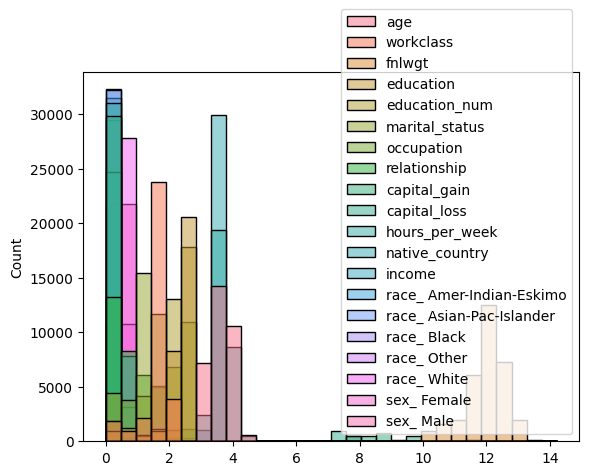

In [32]:
adult1 = np.log1p(adult)  # Log transformation to reduce skewness
# Visualize transformed feature to check for skewness
sns.histplot(adult1, bins=30)
plt.show()

# Feature Selection

In [33]:
from sklearn.ensemble import IsolationForest

In [34]:
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(adult)

IsolationForest(contamination=0.01, random_state=10)

In [35]:
# predictions
y_pred_outliers = clf.predict(adult)

In [36]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [37]:
adult['scores']=clf.decision_function(adult.iloc[:,0:20])

In [38]:
adult['anomaly']=clf.predict(adult.iloc[:,0:20])
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,income,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,scores,anomaly
0,39,7,77516,9,13,4,1,1,2174,0,...,0,0,0,0,0,1,0,1,0.146686,1
1,50,6,83311,9,13,2,4,0,0,0,...,0,0,0,0,0,1,0,1,0.168516,1
2,38,4,215646,11,9,0,6,1,0,0,...,0,0,0,0,0,1,0,1,0.207361,1
3,53,4,234721,1,7,2,6,0,0,0,...,0,0,0,1,0,0,0,1,0.083417,1
4,28,4,338409,9,13,2,10,5,0,0,...,0,0,0,1,0,0,1,0,0.015247,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,0,0,...,0,0,0,0,0,1,1,0,0.128435,1
32557,40,4,154374,11,9,2,7,0,0,0,...,1,0,0,0,0,1,0,1,0.216874,1
32558,58,4,151910,11,9,6,1,4,0,0,...,0,0,0,0,0,1,1,0,0.144136,1
32559,22,4,201490,11,9,4,1,3,0,0,...,0,0,0,0,0,1,0,1,0.192921,1


In [39]:
#Print the outlier data points
adult[adult['anomaly']==-1]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,income,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,scores,anomaly
52,47,4,51835,14,15,2,10,5,0,1902,...,1,0,0,0,0,1,1,0,-0.019456,-1
93,30,4,117747,11,9,2,12,5,0,1573,...,0,0,1,0,0,0,1,0,-0.026627,-1
157,71,6,494223,15,10,5,12,4,0,1816,...,0,0,0,1,0,0,0,1,-0.043142,-1
226,60,0,24215,0,6,0,0,1,0,0,...,0,1,0,0,0,0,1,0,-0.042973,-1
297,39,0,157443,12,14,2,0,5,3464,0,...,0,0,1,0,0,0,1,0,-0.029303,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32254,31,4,251659,15,10,2,8,0,0,1485,...,1,0,1,0,0,0,0,1,-0.031274,-1
32370,53,6,137547,14,15,4,10,1,27828,0,...,1,0,1,0,0,0,0,1,-0.012955,-1
32425,23,4,180771,3,2,2,7,5,0,0,...,0,1,0,0,0,0,1,0,-0.016405,-1
32508,45,4,155093,0,6,0,8,1,0,0,...,0,0,0,1,0,0,1,0,-0.005570,-1


In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
!pip install --upgrade numpy==1.25.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 58.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.2 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.


In [1]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 49.3 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13166 sha256=1504287b2f6e99d86e7adceaa25309d951a68cd4744d8dc2b21dfbdee22bf2d4
  Stored in directory: /root/.cache/pip/wheels/7e/45/08/bb444e1bca6a2bc3795707de9edd87ec1976dd8b3570fa7abf
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.3 requires pandas>=2.2.0, but you have pandas 1.5.3 which is

# Distributions

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

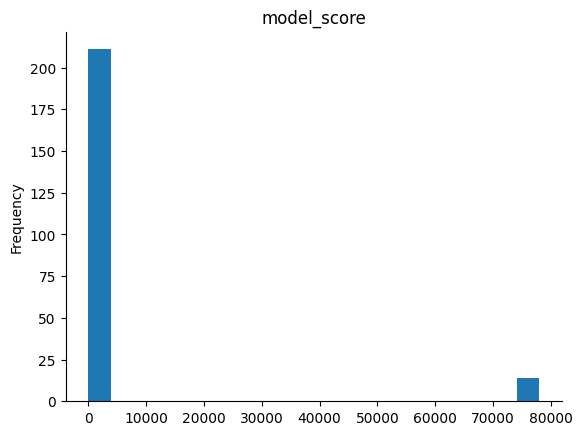

In [2]:
from matplotlib import pyplot as plt
import ppscore as pps
import pandas as pd
# Assuming df is your DataFrame loaded from 'adult_with_headers.csv'
df = pd.read_csv("/content/adult_with_headers.csv")
# Calculate PPS matrix and store it in a DataFrame
pps_matrix = pps.matrix(df)
# Access the 'model_score' column of the PPS matrix
pps_matrix['model_score'].plot(kind='hist', bins=20, title='model_score')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [3]:
import warnings
warnings.filterwarnings("ignore")

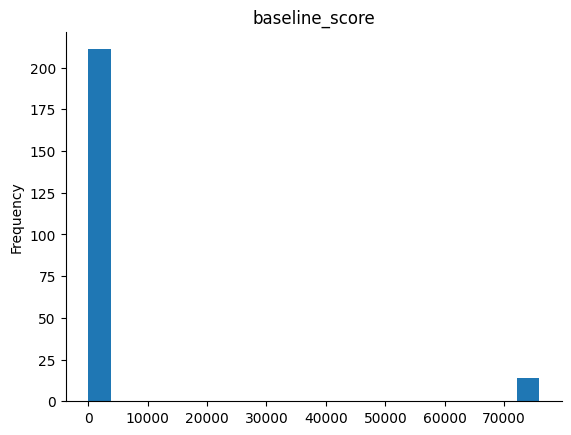

In [4]:
from matplotlib import pyplot as plt
pps_matrix['baseline_score'].plot(kind='hist', bins=20, title='baseline_score') # Changed _df_1 to pps_matrix
plt.gca().spines[['top', 'right',]].set_visible(False)

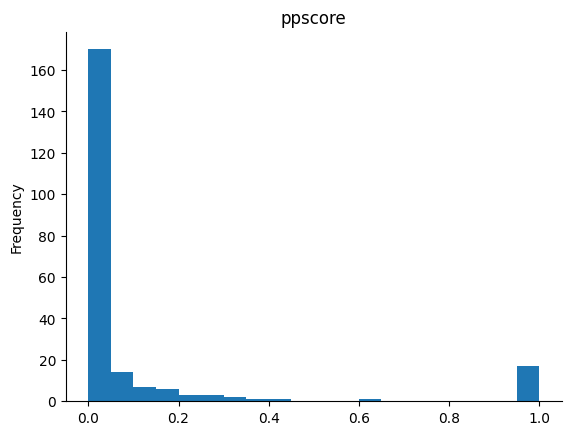

In [5]:
from matplotlib import pyplot as plt
pps_matrix['ppscore'].plot(kind='hist', bins=20, title='ppscore')
plt.gca().spines[['top', 'right',]].set_visible(False)